In [72]:
# Import required libraries
import mlmodels
from mlmodels.models import module_load
from mlmodels.util import load_config
# from mlmodels.model_gluon.util import fit, metrics
from mlmodels.models import module_load_full, fit, predict

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Define model and data definitions

In [86]:
model_uri = "model_gluon.gluon_deepar.py"
out_path = "ztest/model_gluon/gluon_deepar/"    
data_path = "../dataset/tabular"

data_pars = {"train_data_path": data_path + "/titanic_train_preprocessed.csv",  
            "test_data_path": data_path + "/titanic_test_preprocessed.csv",  
            "train": True,
            "uri_type": "csv",
            "num_series": 37,
            "prediction_length":48,
            "col_target": "Survived",
            "start": pd.Timestamp("01-01-1750", freq='1H'),
            'freq': '1H'
            }

model_pars = {
            "model_type": "tabular", "learning_rate_min": 1e-4,
            "learning_rate_max": 1e-2, "learning_rate_default": 5e-4,
            "activation": [
                            "relu",
                            "softrelu",
                            "tanh"
                            ],
            "layers": [
                        [100 ], 
                        [1000 ], 
                        [200, 100 ], 
                        [300, 200, 100 ] 
                        ],
            "dropout_prob_min": 0.0, "dropout_prob_max": 0.5, "dropout_prob_default": 0.1,
            "num_boost_round": 100, "num_leaves_lower": 26, "num_leaves_upper": 66, 
            "num_leaves_default": 36, "prediction_length": 10, "freq": '1H',
            "num_layers": 2, "num_cells": 40, "cell_type": 'lstm', "dropout_rate": 0.1,
            "use_feat_dynamic_real": False, "use_feat_static_cat": False, 
            "use_feat_static_real": False, "scaling": True, "num_parallel_samples": 100
            }

compute_pars = {"batch_size": 32, "clip_gradient": 100, "ctx": None, 
                "epochs": 1, "init": "xavier", "learning_rate": 1e-3,
                "learning_rate_decay_factor": 0.5, "hybridize": False,
                "num_batches_per_epoch": 10, 'num_samples': 100,
                "minimum_learning_rate": 5e-05, "patience": 10, "weight_decay": 1e-08}

out_pars = {"outpath": out_path + "result", 
            "plot_prob": True, "quantiles": [0.1, 0.5, 0.9]}

In [100]:


model_path = "../model_gluon/gluon_deepar.py"
data_pars = {"train_data_path": data_path + "/titanic_train_preprocessed.csv",  
            "test_data_path": data_path + "/titanic_test_preprocessed.csv",  
                "train": True,
                'prediction_length': 10, 'freq': '1H', 
                "start": pd.Timestamp("01-01-1750", freq='1H'), 
                "num_series": 37,
                "save_fig": "./series.png", "modelpath": model_path}

model_pars = {"prediction_length": data_pars["prediction_length"], "freq": data_pars["freq"],
                "num_layers": 2, "num_cells": 40, "cell_type": 'lstm', "dropout_rate": 0.1,
                "use_feat_dynamic_real": False, "use_feat_static_cat": False,    
                "use_feat_static_real": False, "scaling": True, "num_parallel_samples": 100}


compute_pars = {"batch_size": 32, "clip_gradient": 100, "ctx": None, "epochs": 1, "init": "xavier",
                "learning_rate": 1e-3,
                "learning_rate_decay_factor": 0.5, "hybridize": False, "num_batches_per_epoch": 10,
                'num_samples': 100,
                "minimum_learning_rate": 5e-05, "patience": 10, "weight_decay": 1e-08}

out_pars = {"outpath": out_path + "result", 
            "plot_prob": True, "quantiles": [0.1, 0.5, 0.9]}

## Load parameters and train

In [101]:
module = module_load( model_uri= model_uri )                            
model = module.Model(model_pars=model_pars, compute_pars=compute_pars) 

INFO:root:Using CPU


## Train the model

In [102]:
model = fit(module, model, data_pars=data_pars, model_pars=model_pars, compute_pars=compute_pars, out_pars=out_pars)      

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/10 [00:00<?, ?it/s]learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.
INFO:root:Number of parameters in DeepARTrainingNetwork: 27644
100%|██████████| 10/10 [00:01<00:00,  5.96it/s, avg_epoch_loss=3.14]
INFO:root:Epoch[0] Elapsed time 1.682 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=3.137573
INFO:root:Loading parameters from best epoch (0)
INFO:root:Final loss: 3.137572979927063 (occurred at epoch 0)
INFO:root:End model training


## Get predictions

In [103]:
ypred = predict(module, model, data_pars=data_pars, compute_pars=compute_pars, out_pars=out_pars)
metrics_val, item_metrics = metrics(ypred, data_pars, compute_pars, out_pars)
print(metrics_val)

Running evaluation: 100%|██████████| 37/37 [00:00<00:00, 98.45it/s]{
    "MSE": 82825.48445945946,
    "abs_error": 34081.17987060547,
    "abs_target_sum": 34081.17987060547,
    "abs_target_mean": 92.11129694758235,
    "seasonal_error": NaN,
    "MASE": NaN,
    "sMAPE": 2.0,
    "MSIS": NaN,
    "QuantileLoss[0.1]": 6816.236020163637,
    "Coverage[0.1]": 0.0,
    "QuantileLoss[0.5]": 34081.18010081529,
    "Coverage[0.5]": 0.3324324324324325,
    "QuantileLoss[0.9]": 61346.124181458035,
    "Coverage[0.9]": 0.3324324324324325,
    "RMSE": 287.79417030137955,
    "NRMSE": 3.124417740694219,
    "ND": 1.0,
    "wQuantileLoss[0.1]": 0.20000000135096682,
    "wQuantileLoss[0.5]": 1.0000000067547492,
    "wQuantileLoss[0.9]": 1.8000000121582702,
    "mean_wQuantileLoss": 1.000000006754662,
    "MAE_Coverage": 0.27837837837837837
}



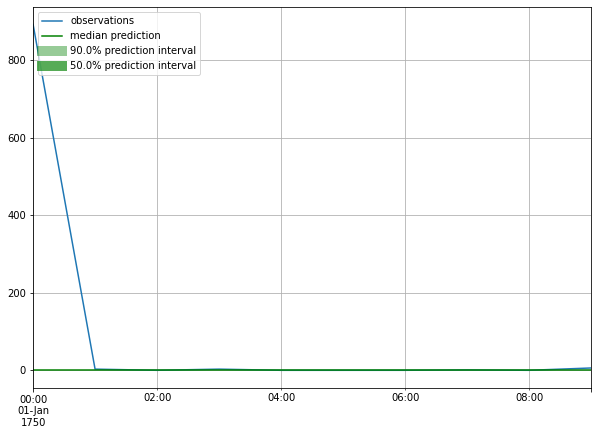

FileNotFoundError: [Errno 2] No such file or directory: 'ztest/model_gluon/gluon_deepar/result.png'

In [104]:
plot_prob_forecasts(ypred, out_pars)
plot_predict(item_metrics, out_pars)